In [2]:
import pandas as pd
df = pd.read_csv('sleep_study_1000.csv')

In [3]:
df.head()

,ID,Age,Gender,Bedtime,WakeupTime,SleepDuration,SleepEfficiency,REMSleepPercentage,DeepSleepPercentage,LightSleepPercentage,Awakenings,CaffeineConsumption,AlcoholConsumption,SmokingStatus,ExerciseFrequency
0,1,80,Female,2025-09-30 07:32:17,2025-09-30 13:49:16.669051,6.283241,0.57,15,35,50,0,25.0,1,Yes,1
1,2,24,Male,2025-06-29 20:59:50,2025-06-30 04:09:10.207162,7.155613,0.91,29,68,3,4,50.0,0,No,2
2,3,37,Male,2025-12-24 21:28:32,2025-12-25 03:31:34.257053,6.050627,0.58,15,35,50,3,50.0,0,No,5
3,4,68,Female,2025-02-22 00:25:33,2025-02-22 07:26:37.046703,7.017791,0.88,28,44,28,1,50.0,0,Yes,4
4,5,58,Male,2025-09-02 12:31:53,2025-09-02 21:17:46.256228,8.764793,0.95,28,40,32,4,25.0,4,No,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   Bedtime               1000 non-null   object 
 4   WakeupTime            1000 non-null   object 
 5   SleepDuration         1000 non-null   float64
 6   SleepEfficiency       1000 non-null   float64
 7   REMSleepPercentage    1000 non-null   int64  
 8   DeepSleepPercentage   1000 non-null   int64  
 9   LightSleepPercentage  1000 non-null   int64  
 10  Awakenings            1000 non-null   int64  
 11  CaffeineConsumption   744 non-null    float64
 12  AlcoholConsumption    1000 non-null   int64  
 13  SmokingStatus         1000 non-null   object 
 14  ExerciseFrequency     1000 non-null   int64  
dtypes: float64(3), int64(8

In [5]:
print(df.isna().sum())

ID                        0
Age                       0
Gender                    0
Bedtime                   0
WakeupTime                0
SleepDuration             0
SleepEfficiency           0
REMSleepPercentage        0
DeepSleepPercentage       0
LightSleepPercentage      0
Awakenings                0
CaffeineConsumption     256
AlcoholConsumption        0
SmokingStatus             0
ExerciseFrequency         0
dtype: int64


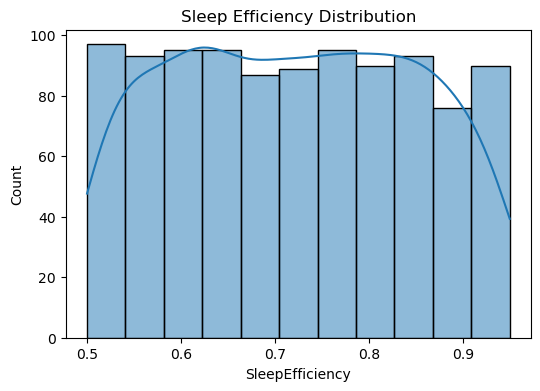

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df["SleepEfficiency"], kde=True)
plt.title("Sleep Efficiency Distribution")
plt.show()

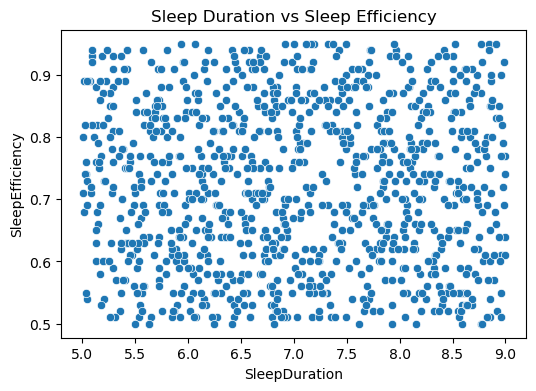

In [10]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="SleepDuration", y="SleepEfficiency", data=df)
plt.title("Sleep Duration vs Sleep Efficiency")
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [12]:
df["Bedtime"] = pd.to_datetime(df["Bedtime"])
df["WakeupTime"] = pd.to_datetime(df["WakeupTime"])
df["BedtimeHour"] = df["Bedtime"].dt.hour
df["WakeupHour"] = df["WakeupTime"].dt.hour
df.drop(["Bedtime", "WakeupTime", "ID"], axis=1, inplace=True)

In [13]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["SmokingStatus"] = le.fit_transform(df["SmokingStatus"])

In [14]:
X = df.drop("SleepEfficiency", axis=1)
y = df["SleepEfficiency"]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [18]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MAE: 0.11395000000000004
R2 Score: -0.08938874783797379
